# COVID by State, colored per CDC foreign travel advisory map

On the CDC page https://www.cdc.gov/coronavirus/2019-ncov/travelers/map-and-travel-notices.html the CDC communicates foreign travel advisories on a map like this

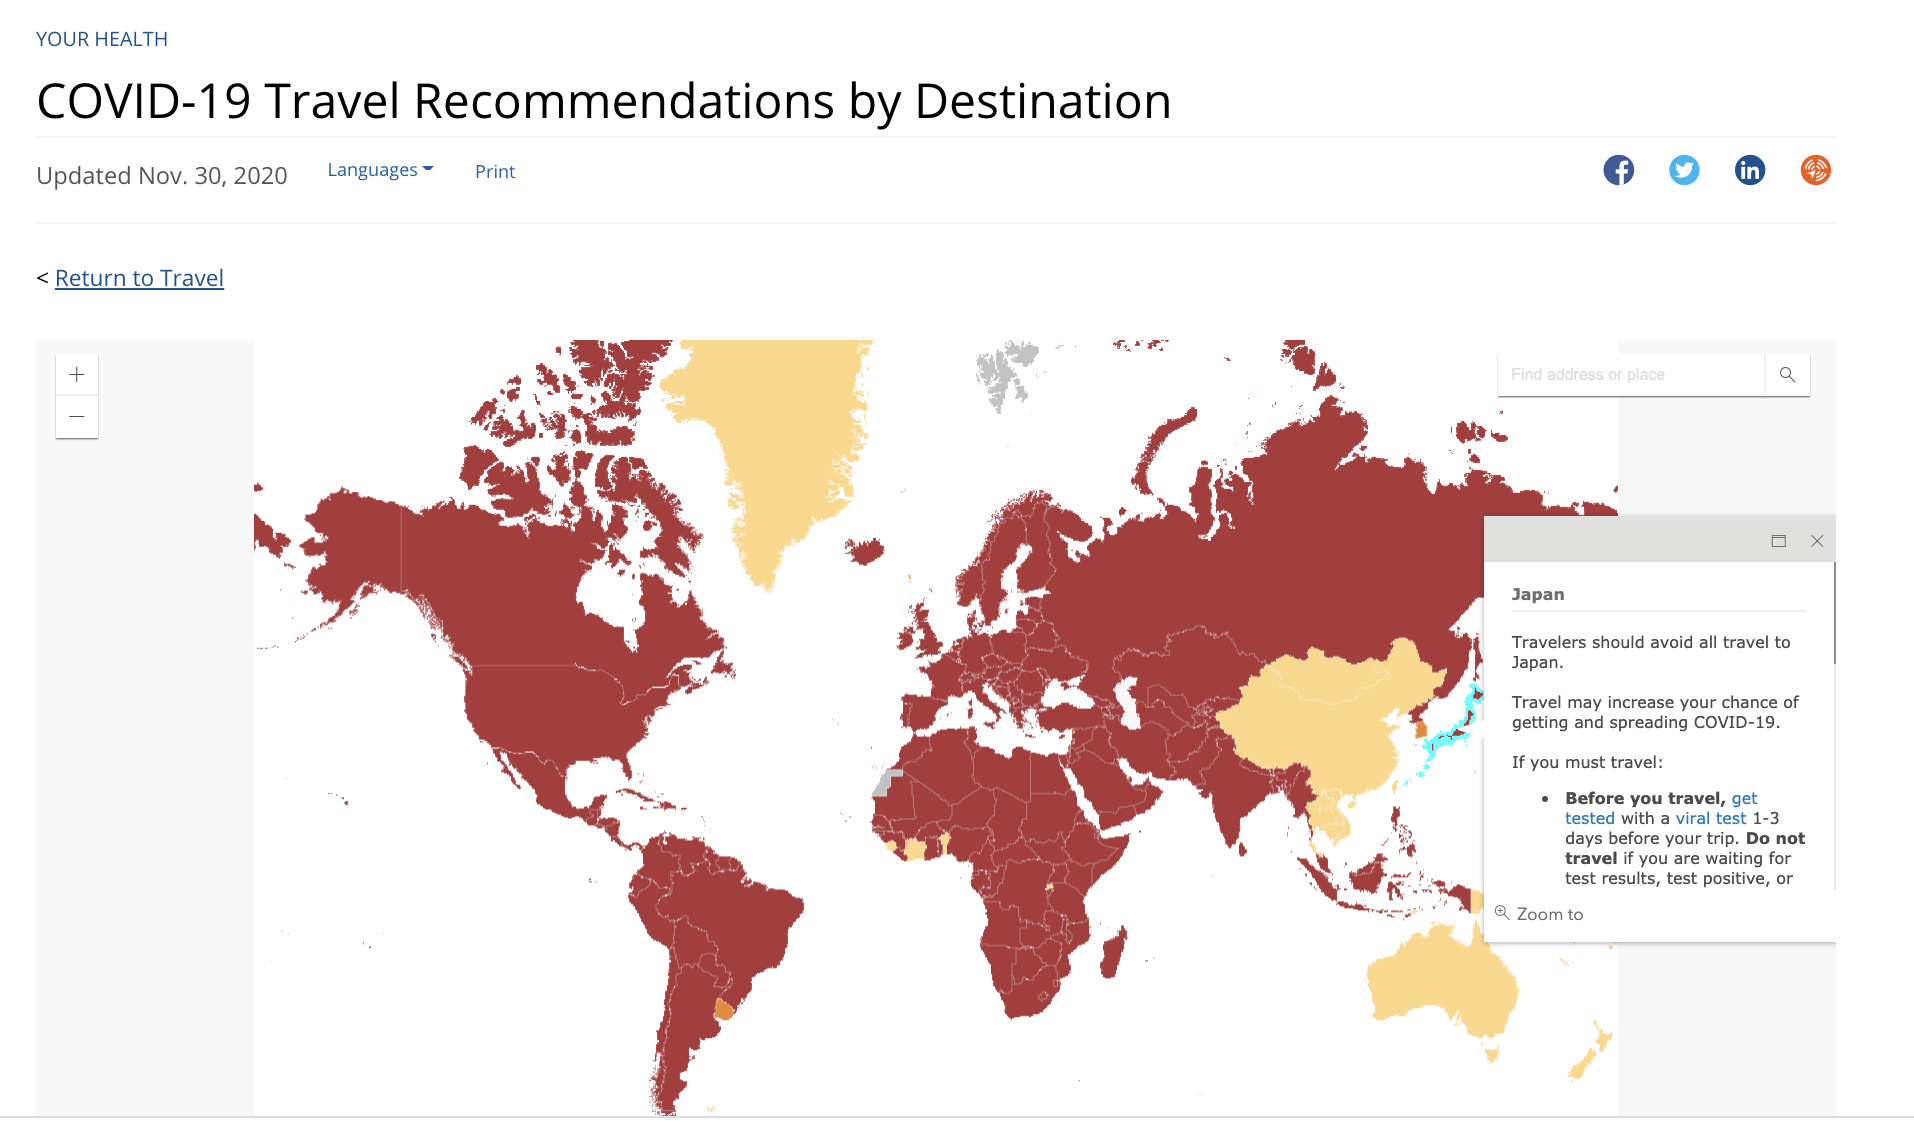

But on the US page, the CDC uses cooler, calmer colors, with 4x higher thresholds to make a map like this:

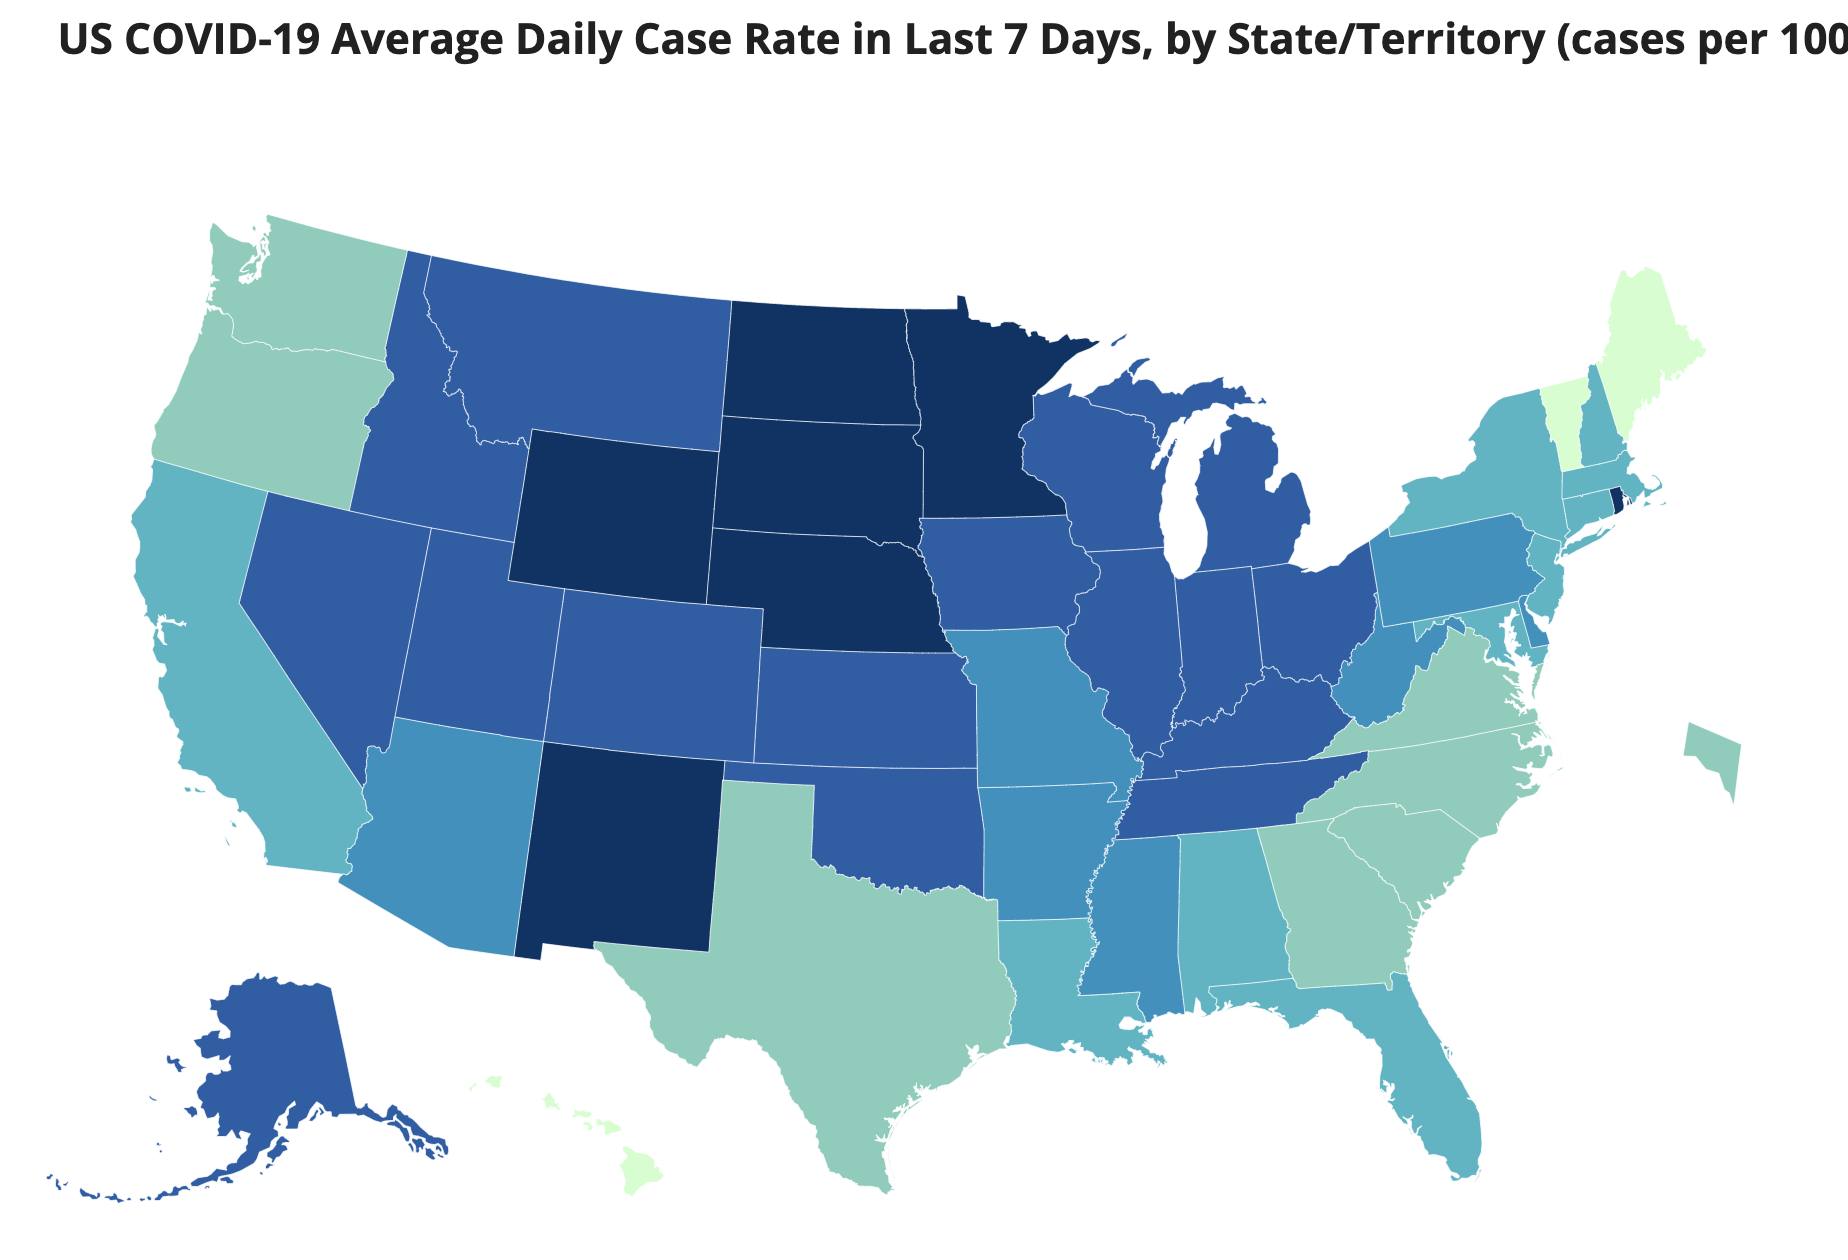

I'm curious how the foreign travel advisory thresholds would look for a US Map.

Based on https://www.cdc.gov/coronavirus/2019-ncov/travelers/how-level-is-determined.html the color scheme is:

* Dark Red: Very High,  >100cases/28days/100kpop -- Travelers should avoid all travel...
* Dark Orange: High, >50cases/28days/100kpop -- Travelers should avoid all nonessential travel...
* Light Orange: Moderate, >5cases/28days/100kpop -- Travelers at increased risk for severe illness from COVID-19 should avoid all nonessential travel...
* Yellow: Low, <5cases/28days/100kpop -- All travelers should wear a mask, stay at least 6 feet from people who are not from your household, wash your hands often or use hand sanitizer, and watch your health for signs of illness.



In [55]:
import os,geopandas, folium
import branca # for a colorscale
import pandas as pd

In [54]:
# Downloaded state data from https://github.com/python-visualization/folium/blob/master/examples/data/us-states.json
state_json=os.path.join('/Users/drf/Downloads/', 'us-states.json')
state = geopandas.read_file(state_json)

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9..."
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022..."
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683..."
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003..."
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787..."


In [26]:
# #downloaded population data from Census https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/

census_pop_state_file=os.path.join('/Users/drf/Downloads/', 'SCPRC-EST2019-18+POP-RES.csv')

pops = pd.read_csv(census_pop_state_file)
#display(pops)

In [53]:
# map 2-letter codes to population data using https://github.com/drf5n/fips-codes/blob/patch-1/state_fips_master.csv modded from 
# https://github.com/kjhealy/fips-codes/blob/master/state_fips_master.csv
statemaster = pd.read_csv('https://raw.githubusercontent.com/drf5n/fips-codes/patch-1/state_fips_master.csv')
pop_augment = pops.set_index('STATE').join(statemaster.set_index('state')['state_abbr']).reset_index()
display(pop_augment)

,STATE,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,state_abbr
0,0,10,0,0,United States,328239523,255200373,77.7,NaN
1,1,40,3,6,Alabama,4903185,3814879,77.8,AL
2,2,40,4,9,Alaska,731545,551562,75.4,AK
3,4,40,4,8,Arizona,7278717,5638481,77.5,AZ
4,5,40,3,7,Arkansas,3017804,2317649,76.8,AR
5,6,40,4,9,California,39512223,30617582,77.5,CA
6,8,40,4,8,Colorado,5758736,4499217,78.1,CO
7,9,40,1,1,Connecticut,3565287,2837847,79.6,CT
8,10,40,3,5,Delaware,973764,770192,79.1,DE
9,11,40,3,5,District of Columbia,705749,577581,81.8,DC


In [14]:
# Download the state-level covid case histories from...  

covids = pd.read_json('https://api.covidtracking.com/v1/states/daily.json')

#covids["date"] = pd.to_datetime(covids['date'])
display(covids)




,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201202,AK,32531.0,NaN,992112.0,NaN,totalTestsViral,1024643.0,164.0,768.0,...,1024643,0,19,a67835c9975e7a741cbe7511d7b8014f238f7381,0,0,0,0,0,
1,20201202,AL,256828.0,43656.0,1390351.0,NaN,totalTestsPeopleViral,1603523.0,1801.0,25821.0,...,1647179,73,211,4aa82c6006d2babec8c2e4268bc0d73e2681fe76,0,0,0,0,0,
2,20201202,AR,161521.0,20816.0,1562561.0,NaN,totalTestsViral,1703266.0,1088.0,9110.0,...,1724082,10,89,c308123d961c64d4b4a6af4322403aeaf60068bc,0,0,0,0,0,
3,20201202,AS,0.0,NaN,1988.0,NaN,totalTestsViral,1988.0,NaN,NaN,...,1988,0,0,143aca9d5c4a0285942d475cd2eed1ff04a7e129,0,0,0,0,0,
4,20201202,AZ,340979.0,10662.0,1957887.0,NaN,totalTestsPeopleViral,2288204.0,2699.0,26312.0,...,2298866,52,240,c0cd7c5dece0c9818929d1a7b8d781a133cd3a61,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15404,20200124,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,82726df68eb97c98a4a6ee792349e547023147d5,0,0,0,0,0,
15405,20200123,MA,NaN,NaN,NaN,NaN,totalTestsViral,2.0,NaN,NaN,...,0,0,0,76bc987d054b119a4e05a4a43742249c0b0568b6,0,0,0,0,0,
15406,20200123,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,...,0,0,0,1c2229c239ffad5e5fdd9d76c641dc9166caf6ba,0,0,0,0,0,
15407,20200122,MA,NaN,NaN,NaN,NaN,totalTestsViral,1.0,NaN,NaN,...,0,0,0,01f5dcd6631859503ef1b62d81d49e41d12fc1bd,0,0,0,0,0,


In [181]:
df = covids.sort_values(by=['state', 'date'])
#display(df.tail())

df['TC_diff']= df.groupby('state')['positive'].diff().fillna(0)
df['TC_sum14']= df.groupby('state')['positive'].diff(14).fillna(0)
df['TC_sum28']= df.groupby('state')['positive'].diff(28).fillna(0)

dfy = df[df['date']==20201202].copy()
dfya = dfy.set_index('state').join(pop_augment.set_index('state_abbr'),lsuffix='lj').reset_index()

dfya['per100k_14daysum']=dfya['TC_sum14']*100000/dfya['POPESTIMATE2019']
dfya['per100k_28daysum']=dfya['TC_sum28']*100000/dfya['POPESTIMATE2019']
dfya['per100k_1daysum']=dfya['TC_diff']*100000/dfya['POPESTIMATE2019']
#display(dfya.columns)

#display(dfya[['state','date','per100k_1daysum','per100k_14daysum', 'per100k_28daysum']])

dfya['foreign']= pd.cut(dfya['per100k_28daysum'],
                       bins=[-1,5,20,100,50000],
                       labels=['Level 1, Low:  All travelers should wear a mask, stay at least 6 feet from people who are not from your household, wash your hands often or use hand sanitizer, and watch your health for signs of illness.',
                                'Level 2, Moderate: Travelers at increased risk for severe illness from COVID-19 should avoid all nonessential travel.',
                                'Level 3, High: Travelers should avoid all nonessential travel',
                                'Level 4, Very High: Travelers should avoid all travel',
                              ]).astype(str)
dfya['school']= pd.cut(dfya['per100k_14daysum'],
                       bins=[-1,5,20,50,200,50000],
                       labels=['Lowest risk of transmission in schools',
                                'Lower risk of transmission in schools',
                                'Moderate risk of transmission in schools',
                                'Higher risk of transmission in schools',
                                'Highest risk of transmission in schools',
                              ]).astype(str)


file_state_covid='USCovidStates.geojson'
gjson = state.set_index('id').join(dfya[['state','date','positive','POPESTIMATE2019','per100k_1daysum','per100k_14daysum', 'per100k_28daysum','foreign','school']].set_index('state'))
gjson.to_file(file_state_covid, driver='GeoJSON')
display(gjson.head())

,name,geometry,date,positive,POPESTIMATE2019,per100k_1daysum,per100k_14daysum,per100k_28daysum,foreign,school
id,,,,,,,,,,
AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",20201202,256828.0,4903185.0,80.111193,680.006975,1204.339628,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission in schools
AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",20201202,32531.0,731545.0,95.277802,1108.885988,2150.653753,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission in schools
AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",20201202,340979.0,7278717.0,52.756550,795.153871,1241.235234,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission in schools
AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",20201202,161521.0,3017804.0,73.298332,792.099156,1514.644424,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission in schools
CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",20201202,1245948.0,39512223.0,52.538173,501.513165,774.286985,"Level 4, Very High: Travelers should avoid all...",Highest risk of transmission in schools


In [154]:
#Make some colorscales

# branca color names are defined in https://raw.githubusercontent.com/python-visualization/branca/master/branca/_cnames.json

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 200)
colorscale = branca.colormap.linear.YlOrRd_09.to_step(index=[0,5,20,50, 200,500, 1000])

colorscale_28 = branca.colormap.StepColormap(
    ['yellow','orange','darkorange','red','red','black'], 
    index=[0,5,50,100,4000,5000], caption='New Cases/28days/100k',vmin=0, vmax=200,
)

colorscale_14 = branca.colormap.StepColormap(
    ['blue','green','yellow','orange','red','darkred','red','black'], 
    index=[0,5,20,50,200,201,1000,5000], caption='New Cases/14days/100k',vmin=0, vmax=400,
)

colorscale_1 = branca.colormap.StepColormap(
    ['blue','green','yellow','orange','red','red','red','black'], 
    index=[0,5,20,50,200,201,1000,5000], caption='New Cases/28days/100k',vmin=0, vmax=400,
)

display(colorscale_28)
display(colorscale_28.to_linear())




In [186]:
# Make a map out of it:
m = folium.Map(location=[37.9, -90], zoom_start=4)

display(gjson.columns)

def style_function_28(feature):
    y=feature['properties']['per100k_28daysum']
   # print(feature)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if y is None else colorscale_28(y)
    }

folium.GeoJson(
    file_state_covid,
    name='geojson',
    style_function=style_function_28,
    highlight_function=lambda x: {'weight': 2, 'color':'black', 'fillOpacity': 0.4,},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name',"date",'per100k_28daysum',"POPESTIMATE2019",'foreign','school'],
        aliases=['State','Date','Cases/28d/100kpop','2019 Population','CDC Foreign Travel Rec.','CDC School'],),
    
).add_to(m)
m.add_child(colorscale_28)
m.save('us_covid_states_map.html')
m

Index(['name', 'geometry', 'date', 'positive', 'POPESTIMATE2019',
       'per100k_1daysum', 'per100k_14daysum', 'per100k_28daysum', 'foreign',
       'school'],
      dtype='object')